# Words as Vectors

# 单词作为向量

原文地址：https://iksinc.online/tag/continuous-bag-of-words-cbow/

Vector space model is well known in information retrieval where each document is represented as a vector. The vector components represent weights or importance of each word in the document. The similarity between two documents is computed using the cosine similarity measure.

向量空间模型在信息检索众所周知，每个文档被表示为一个向量。向量元素代表文档中每个单词的权重或者重要性。使用余弦相似计量方法计算两个文档的相似性。

Although the idea of using vector representation for words also has been around for some time, the interest in word embedding, techniques that map words to vectors, has been soaring recently. One driver for this has been Tomáš Mikolov’s Word2vec algorithm which uses a large amount of text to create high-dimensional (50 to 300 dimensional) representations of words capturing relationships between words unaided by external annotations. Such representation seems to capture many linguistic regularities. For example, it yields a vector approximating the representation for vec(‘Rome’) as a result of the vector operation vec(‘Paris’) – vec(‘France’) + vec(‘Italy’).

尽管使用向量表示单词的思想由来已久，词嵌入——把单词映射为向量的技术的兴趣，最近正在飙升。其中的驱动力之一是Tomas Mikolov的Word2vec算法，它使用大量文本创建单词的高维（50到300维）表示，捕获单词间的关系，无需外部标注。这种表示似乎可以捕获许多语言规则。例如，它产生一个近似表示vec('Rome')的向量，作为向量运算vec('Paris') - vec('France') + 向量('Italy')的结果。

Word2vec uses a single hidden layer, fully connected neural network as shown below. The neurons in the hidden layer are all linear neurons. The input layer is set to have as many neurons as there are words in the vocabulary for training. The hidden layer size is set to the dimensionality of the resulting word vectors. The size of the output layer is same as the input layer. Thus, assuming that the vocabulary for learning word vectors consists of V words and N to be the dimension of word vectors, the input to hidden layer connections can be represented by matrix WI of size VxN with each row representing a vocabulary word. In same way, the connections from hidden layer to output layer can be described by matrix WO of size NxV. In this case, each column of WO matrix represents a word from the given vocabulary. The input to the network is encoded using “1-out of -V” representation meaning that only one input line is set to one and rest of the input lines are set to zero.

Word2vec使用一个单隐层、全连接的神经网络，如下（图）所示。隐层神经元全是线性神经元。输入层设置为具有与训练词汇中的单词一样多的神经元。输出层的个数与输入层（的个数）一样多。如此，假设用于学习的词汇表单词向量由V个单词组成，词向量维数为N，则输入到隐层连接可以用大小为V×N的矩阵WI表示，WI中每一行表示词汇中的一个单词。以同样的方式，从隐层到输出层的连接可以用大小为N×V的矩阵WO表示。在这种情况下，矩阵WO的每一列表示给定词汇表中的一个单词。使用‘1-out of-V’表示网络输入编码，意味着只有一个输入行被设置为1，其余输入行设置为零。

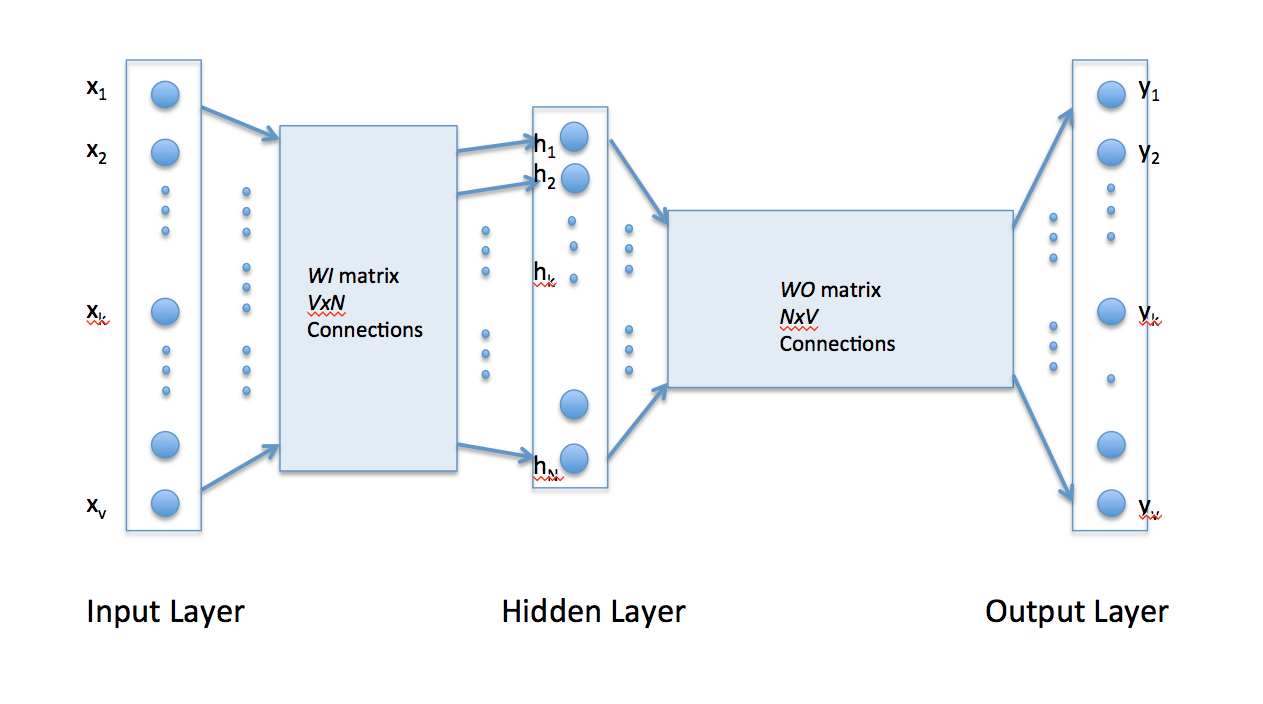

To get a better handle on how Word2vec works, consider the training corpus having the following sentences:


“the dog saw a cat”, “the dog chased the cat”, “the cat climbed a tree”

为了更好的掌握Word2vec是如何工作的，考虑训具有如下语句的训练语料库：

"the dog saw a cat","the dog chased the cat","the cat climbed a tree"

The corpus vocabulary has eight words. Once ordered alphabetically, each word can be referenced by its index. For this example, our neural network will have eight input neurons and eight output neurons. Let us assume that we decide to use three neurons in the hidden layer. This means that WI and WO will be 8×3 and 3×8 matrices, respectively. Before training begins, these matrices are initialized to small random values as is usual in neural network training. Just for the illustration sake, let us assume WI and WO to be initialized to the following values:

这个语料库词汇表有8个单词。一旦根据字母排序，每个单词可以通过其索引引用。例如：我们的神经网络将会有8个输入神经元和8个输出神经元。让我们假设在隐层我们决定用3个神经元。这意味着，WI和WO将分别是8×3和3×8的矩阵。训练开始之前，像一般神经网络训练一样用较小的随机数初始化这两个矩阵。仅为了说明清楚，让我们假设初始化后的WI和WO如下：

WI=
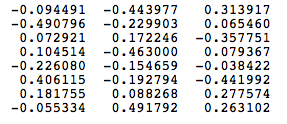

WO=
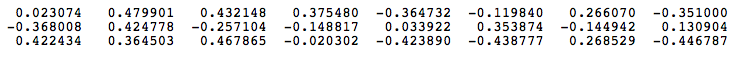

suppose we want the network to learn relationship between the words “cat” and “climbed”. That is, the network should show a high probability for “climbed” when “cat” is inputted to the network. In word embedding terminology, the word “cat” is referred as the context word and the word “climbed” is referred as the target word. In this case, the input vector X will be [0 1 0 0 0 0 0 0]t. Notice that only the second component of the vector is 1. This is because the input word is “cat” which is holding number two position in sorted list of corpus words. Given that the target word is “climbed”, the target vector will look like [0 0 0 1 0 0 0 0 ]t.

假如我们想要神经网络学习单词"cat"和"climbed"之间的关系。那就是说，当输"cat"到网络时，该网络应该对"climbed"显示一个高概率。在词嵌入技术(术语)中，单词"cat"被称为上下文单词，单词"climbed"被称为单词。在本案中，输入向量X会是[0 1 0 0 0 0 0 0]t。注意只有向量的第二个分量是1。这是因为在语料库单词的排序列表中，"cat"这个词保持在第二位置。给定目标单词"climbed",他的目标向量将会是[0 0 0 1 0 0 0 0]t。

With the input vector representing “cat”, the output at the hidden layer neurons can be computed as

H<sup>t</sup> = X<sup>t</sup> WI = [-0.490796 -0.229903 0.065460]

用表示"cat"的向量输入，隐层神经元输出可能被计算得到：

H<sup>t</sup> = X<sup>t</sup> WI = [-0.490796 -0.229903 0.065460]


*译注：*
一般教材或论文中，输入层到隐层间的权重矩阵表示为W<sub>NV</sub>,其中N表示隐层神经元数，I表输入层神经元数，因此，神经元隐层输出表示为H=W<sub>NV</sub>X,隐层到输出层同理，即权值矩阵的行数为权值连接的输出层神经元数，权值矩阵的列数为权值矩阵连接的输入层数。本案中，或是作者的习惯或者是为了更好的阐述，选择了不一般的表示方法。

Since the goal is produce probabilities for words in the output layer,  Pr(wordk|wordcontext) for k = 1, V, to reflect their next word relationship with the context word at input, we need the sum of neuron outputs in the output layer to add to one. Word2vec achieves this by converting activation values of output layer neurons to probabilities using the softmax function. Thus, the output of the k-th neuron is computed by the following expression where activation(n) represents the activation value of the n-th output layer neuron:

因为目标是在输出层对单词产生概率，$Pr(word_k|word_{context})$ for $k=1,...,V$,为了反映以上下文词作输入的下一个词的关系，我们需要将神经元的输出总和为1。Word2vec通过使用softmax函数实现把输出层神经元激活值转成概率。如此，第k神经元输出以如下表达式计算，其中激活(n)表示第n个输出层神经元激活值。

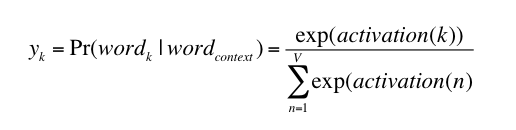

<center> $y_k = Pr(word_k|word_{context})$=${exp(activation(k))}\over{\sum^{V}_{n=1}{exp(activation(n)}}$ </center>

Thus, the probabilities for eight words in the corpus are:

0.143073   0.094925   0.114441   0.111166   0.149289   0.122874   0.119431   0.144800

如此，语料库中这8个词的概率是：
[0.143073 0.094925 **0.114441** 0.111166 0.149289 0.122874 0.119431 0.144800]

The probability in bold is for the chosen target word “climbed”. Given the target vector [0 0 0 1 0 0 0 0 ]t, the error vector for the output layer is easily computed by subtracting the probability vector from the target vector. Once the error is known, the weights in the matrices WO and WI
can be updated using backpropagation. Thus, the training can proceed by presenting different context-target words pair from the corpus. In essence, this is how Word2vec learns relationships between words and in the process develops vector representations for words in the corpus.

加粗的是选择目标词"climbed"概率。给定目标向量[0 0 0 1 0 0 0 0]<sup>t</sup>，输出层的误差向量很容易通过目标向量减去概率向量计算得到。一旦误差向量已知，WO、WI权重矩阵可以通过反向传播更新。如此，训练可以通过递交语料库中不同的上下文-目标单词对进行。本质上讲，这就是Word2vec如何学单词间关系，并在这过程中为语料库中单词开发向量表示。

## Continuous Bag of Words (CBOW) Learning

The above description and architecture is meant for learning relationships between pair of words. In the continuous bag of words model, context is represented by multiple words for a given target words. For example, we could use “cat” and “tree” as context words for “climbed” as the target word. This calls for a modification to the neural network architecture. The modification, shown below, consists of replicating the input to hidden layer connections C times, the number of context words, and adding a divide by C operation in the hidden layer neurons. [An alert reader pointed that the figure below might lead some readers to think that CBOW learning uses several input matrices. It is not so. It is the same matrix, WI, that is receiving multiple input vectors representing different context words]

## 连续词袋模型(Continuous Bag of Words,CBOW)学习
以上的描述和架构旨在学习单词对间的关系。在连续词袋模型中，给定目标词的上下文是用多个单词表示。例如，我们可以用"cat"和"tree"作为目标单词"climbed"的上下文单词。这需要对神经网络架构进行修改。这个修改，如下所示，由复制输入到隐层连接C次和在隐层添加除以C的运算组成，C是上下文单词数。[一位警觉的读者指出下面这幅图可能导致一些读者人为CBOW学习使用多个输入矩阵。不是这样的，是同一个矩阵WI，就是说它接受多个表示不同上下文单词的输入向量]


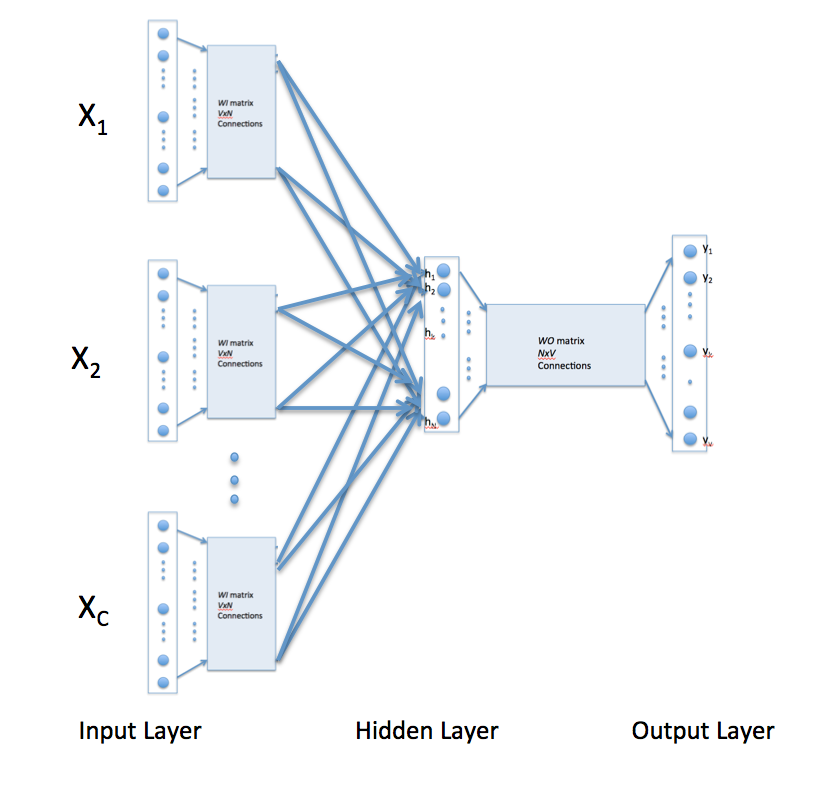

With the above configuration to specify C context words, each word being coded using 1-out-of-V representation means that the hidden layer output is the average of word vectors corresponding to context words at input. The output layer remains the same and the training is done in the manner discussed above.

上述配置指定上下文单词数为C，每个词使用1-out-of V编码表示，意味着隐层输出是对应于输入处上下文单词的词量的平均平均值。输出层保持不变，且训练以与上述讨论同样的方式进行。


## Skip-Gram Model

## Skip-Gram模型

Skip-gram model reverses the use of target and context words. In this case, the target word is fed at the input, the hidden layer remains the same, and the output layer of the neural network is replicated multiple times to accommodate the chosen number of context words. Taking the example of “cat” and “tree” as context words and “climbed” as the target word, the input vector in the skim-gram model would be  [0 0 0 1 0 0 0 0 ]t, while the two output layers would have [0 1 0 0 0 0 0 0] t and [0 0 0 0 0 0 0 1 ]t as target vectors respectively. In place of producing one vector of probabilities, two such vectors would be produced for the current example. The error vector for each output layer is produced in the manner as discussed above. However, the error vectors from all output layers are summed up to adjust the weights via backpropagation. This ensures that weight matrix WO for each output layer remains identical all through training.

Ship-gram 模型颠倒目标和上下文单词的使用。在这种情况下，目标词被馈送到输入，隐层保持相同，并且输出层神经网络被复制多次以适应所选数量的上下文单词。以"cat"和"tree"作上下文单词和"climbed"作目标单词为例，在skim-gram模型中的输入向量该是[0 0 0 1 0 0 0 0]<sup>t</sup>,同时两个输出层（向量）该分别是[0 1 0 0 0 0 0 0]<sup>t</sup>、[0 0 0 0 0 0 0 1]<sup>t</sup>作为目标向量。对于本例子，两个概率向量将会产生取代产生一个概率向量。每一个输出层的误差向量以与上述讨论相同的方式产生。然而，来自所有输出层的误差向量被加和，以通过反向传播调整权重。这确保所有输出层权值矩阵WO在整个训练期间保持相同。

In above, I have tried to present a simplistic view of Word2vec. In practice, there are many other details that are important to achieve training in a reasonable amount of time. At this point, one may ask the following questions:

1. Are there other methods for generating vector representations of words? The answer is yes and I will be describing another method in my next post.

2. What are some of the uses/advantages of words as vectors. Again, I plan to answer it soon in my coming posts.


在上面，我视图呈献一个简单的Word2vec视图。在实际中，有许多其他细节对于在合理时间内实现训练非常重要。在此，你可能会问以下问题:
    
    1. 是否有其他方法可以产生单词的向量表示？答案是肯定的，且我将在我下一篇文章中描述另一种方法。
    2. 单词作为向量的一些作用/优点是什么？我再次计划在我即将发布的文章中尽快回答。